# Shrimper's Trust Membership Report

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('..')

import matplotlib.pyplot as plt
from members.data import load_members

members = load_members("../data/members.csv")

print(f"Imported {len(members)} members.")

Imported 1594 members.


## Headlines

In [3]:
from datetime import datetime, timedelta
print("Report run on: ", datetime.today())
print("Number of members: ", len(members))
date_thirty_days_ago = datetime.today() - timedelta(days=30)
print("Number of new members (last 30 days): ", len([m for m in members if m.date_joined and m.date_joined > date_thirty_days_ago]))

Report run on:  2024-11-10 18:12:36.617773
Number of members:  1594
Number of new members (last 30 days):  3


## Age and gender distribution of members

Genders are guessed based on first names

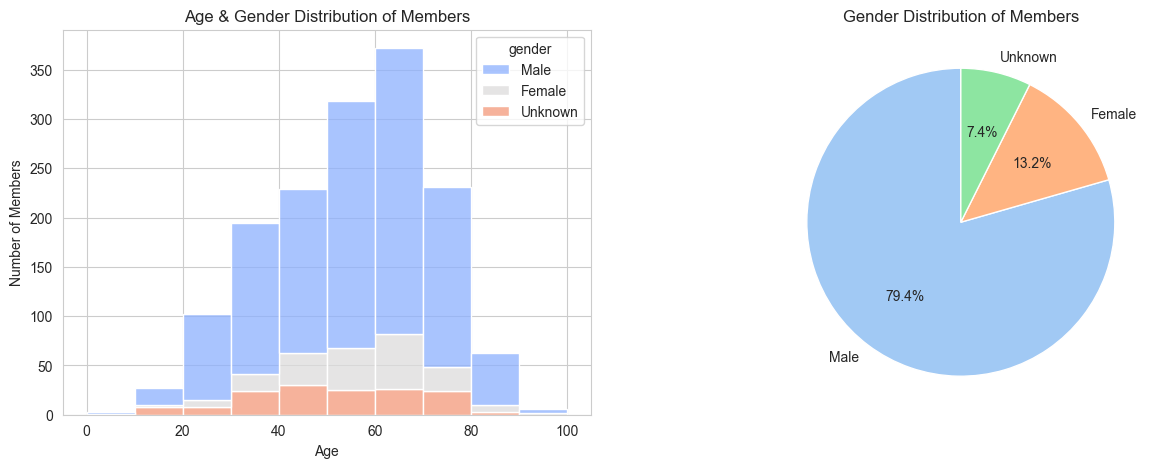

In [4]:
from members.charts.membership import plot_gender_distibution_pie, plot_age_and_gender_distribution

fig, (ax1, ax2) = plt.subplots(1, 2)
plot_gender_distibution_pie(ax2, members)
plot_age_and_gender_distribution(ax1, members)
fig.set_size_inches(15, 5)

plt.show()

## Membership

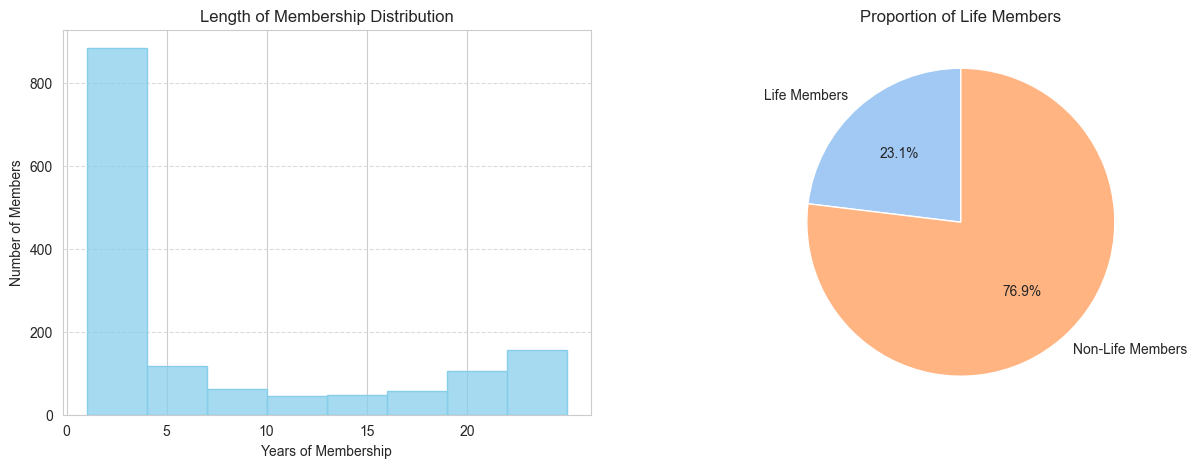

In [5]:
from members.charts.membership import plot_length_of_membership_distribution, plot_pie_of_life_members

fig, (ax1, ax2) = plt.subplots(1, 2)
plot_length_of_membership_distribution(ax1, members)
plot_pie_of_life_members(ax2, members)
fig.set_size_inches(15, 5)

plt.show()

## Renewals

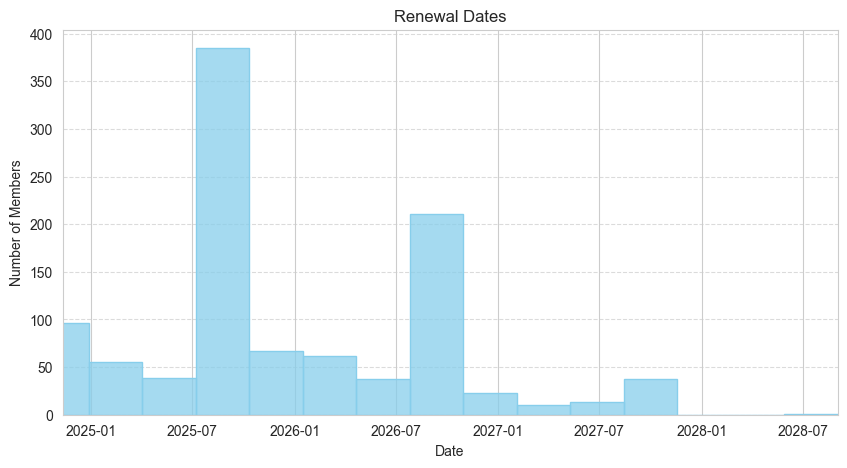

In [6]:
from members.charts.membership import plot_renewal_dates

fig, (ax1) = plt.subplots(1, 1)
plot_renewal_dates(ax1, members)
fig.set_size_inches(10, 5)

plt.show()

## Location

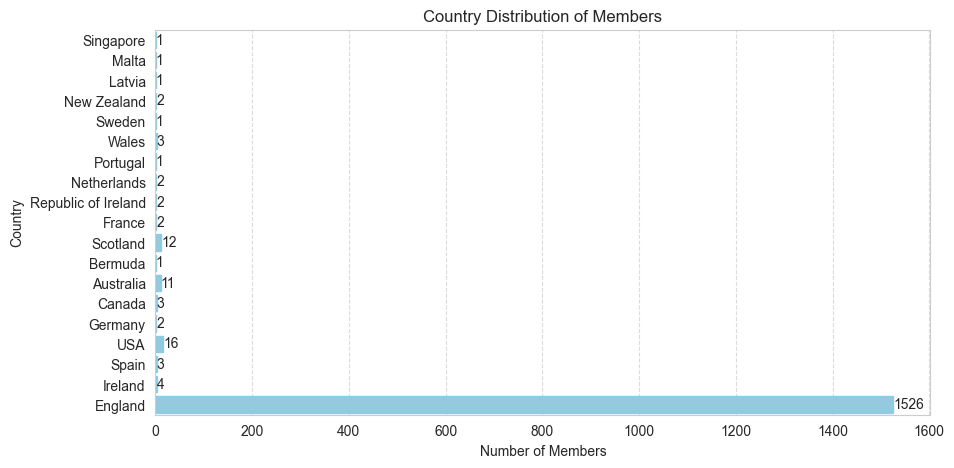

In [7]:
from members.charts.location import plot_country_distribution

fig, (ax1) = plt.subplots(1, 1)
plot_country_distribution(ax1, members)
fig.set_size_inches(10, 5)

plt.show()

In [ ]:
import gmplot
import os
southend = [51.540674,0.6947368]
gmap = gmplot.GoogleMapPlotter(*southend, 14, apikey=os.environ["GOOGLE_API_KEY"], map_type="hybrid")

member_locations = [m.location for m in members]

attractions = zip(*member_locations)

gmap.heatmap(
    *attractions,
    radius=30,
    max_intensity=1,
    gradient=[
    (179, 0, 51, 0.2),    # Deep Red (more transparent)
    (255, 77, 77, 0.4),   # Reddish-Pink
    (255, 179, 102, 0.6), # Orange
    (255, 255, 153, 0.8)  # Soft Yellow (less transparent)
]
)

# Not displayed because of private data
gmap.draw('members.html')

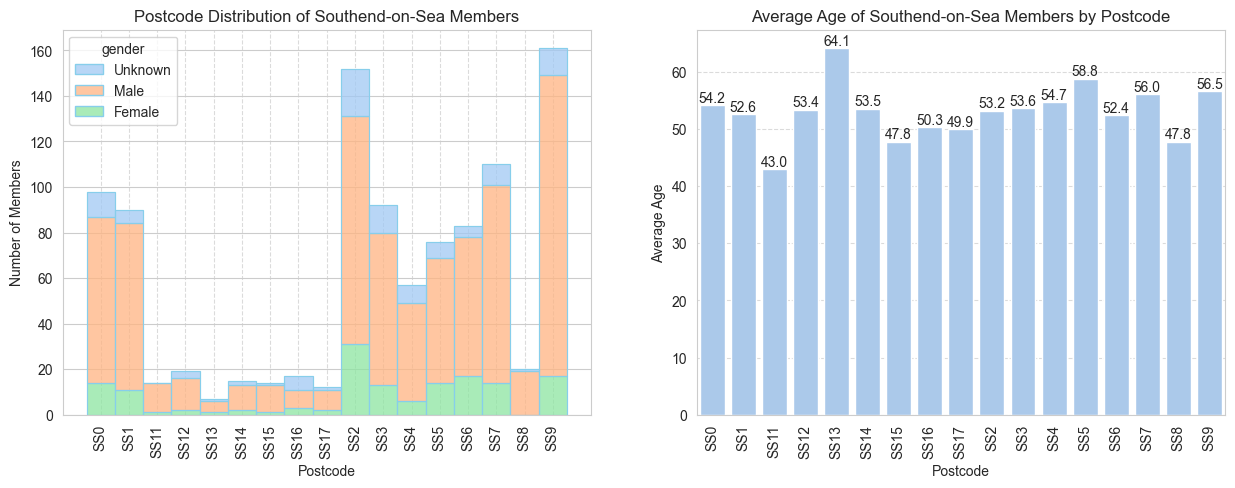

In [9]:
from members.charts.location import plot_southend_postcode_distribution, plot_southend_postcode_average_age

fig, (ax1, ax2) = plt.subplots(1, 2)
plot_southend_postcode_distribution(ax1, members)
plot_southend_postcode_average_age(ax2, members)
fig.set_size_inches(15, 5)
